This script demonstrates the use of a Linear Regression model as a baseline to predict aerosol mixing state index (Chi) using different fraction of the fine-tuning training dataset. The baseline model's performance is evaluated and compared with the fine-tuned model results 
on the MEGAPOLI Marine test dataset.

Key steps include:

1. **Data Preprocessing**:
   - Clean the training dataset by removing rows with missing values.
   - Extract input features and the target variable for model training and testing.

2. **Model Training**:
   - Train a simple Linear Regression model on the selected fraction of the training data.
   - Extract model coefficients and intercept for interpretation.

3. **Evaluation**:
   - Predict Chi values on the test dataset.
   - Calculate evaluation metrics: R², RMSE, MAE, and MAPE.

4. **Visualization**:
   - Plot actual vs. predicted Chi values over the time axis for better interpretability.

5. **Comparison**:
   - The Linear Regression model serves as a baseline for benchmarking against more complex 
     fine-tuned models.

This workflow provides a foundational approach to compare simple baseline models with advanced 
models in aerosol research applications.


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.patches as mpatches

In [47]:
# Load the training dataset
df_train = pd.read_csv('../Data/MEGAPOLI_data/MEGAPOLI_Marine_test_5%.csv')

# Remove rows with missing values
df_train = df_train.dropna()

# Define the input features
input_list = ['O3 (ppb)', 'CO (ppb)', 'NO (ppb)', 'NOx (ppb)',
              'ETH (ppb)', 'TOL(ppb)', 'XYL (ppb)', 'ALD2 (ppb)',
              'AONE (ppb)', 'PAR (ppb)', 'OLET (ppb)', 'Temperature(K)', 'RH',
              'BC (ug/m3)', 'OA (ug/m3)', 'NH4 (ug/m3)', 'NO3 (ug/m3)', 'SO4 (ug/m3)']

# Define the target variable (output)
output_list = df_train.columns[23]  # Assuming the target is the 24th column

# Split the dataset into input features (X) and target variable (y)
X_train = df_train[input_list]
y_train = df_train[output_list]

# Create a linear regression model
model = LinearRegression()

# Train the linear regression model on the training data
model.fit(X_train, y_train)

# Print the coefficients and intercept of the linear regression model
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Coefficients: [ 1.10135516e-02 -6.41019660e-04 -1.08007916e-03  9.67356155e-03
 -2.57307339e-02 -8.92399376e-01  5.78821017e-01 -2.67925716e-01
  4.75452863e-01  1.08604632e-02  7.89626846e-02  4.49814967e-02
  1.77761223e-02 -8.17855172e-02  3.30998427e-02  3.65850867e-01
 -6.35626073e-02 -1.49509550e-01]
Intercept: -11.930945489660514


In [48]:
def calculate_metrics_and_plot(y_true, y_pred, time_column):
    """
    Calculate evaluation metrics and plot actual vs. predicted values.

    Parameters:
    - y_true: Actual target values (ground truth).
    - y_pred: Predicted target values.
    - time_column: Corresponding time column for the x-axis.

    Returns:
    - r2, rmse, mae, mape: Calculated performance metrics.
    """
    # Calculate evaluation metrics
    r2 = r2_score(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    # Print the calculated metrics
    print(f'R2: {r2:.4f}')
    print(f'RMSE: {rmse:.4f}')
    print(f'MAE: {mae:.4f}')
    print(f'MAPE: {mape:.4f}%')

    # Plot actual vs. predicted values over time
    plt.figure(figsize=(10, 6))
    plt.plot(time_column, y_true, label='Actual', color='blue', linewidth=2)
    plt.plot(time_column, y_pred, label='Predicted', color='red', linestyle='--', linewidth=2)
    plt.xlabel('Time', fontsize=14)
    plt.ylabel('Values', fontsize=14)
    plt.title('Actual vs Predicted', fontsize=16)
    plt.legend(fontsize=12)
    plt.grid(alpha=0.3)
    plt.show()

    # Return the calculated metrics
    return r2, rmse, mae, mape


c:\Users\1\miniconda3\envs\partmc\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


R2: -42.6017
RMSE: 0.4041
MAE: 0.2937
MAPE: 47.4037%


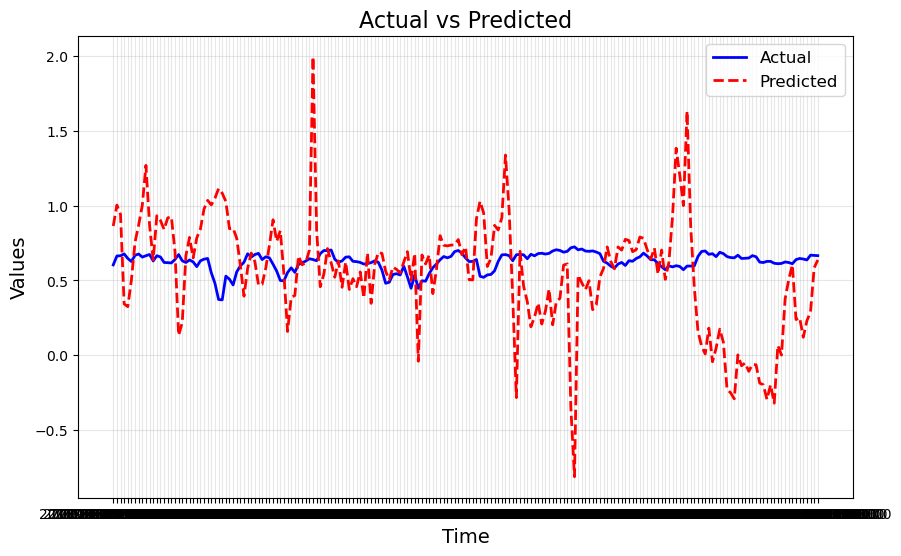

(-42.60167861820923,
 0.4041179903589882,
 0.2937198655181045,
 47.403742628123325)

In [49]:
# Load test dataset
df_test = pd.read_csv('../Data/MEGAPOLI_data/MEGAPOLI_Marine_train_50%.csv')

# Extract input features and target variable from the test dataset
X_test = df_test[input_list]
y_test = df_test[output_list]

# Predict target values using the trained model
y_test_pred = model.predict(X_test)
# baseline_mse = mean_squared_error(y_train, y_test_pred)

# Save actual and predicted values to a CSV file for analysis
results_df = pd.DataFrame({
    'Time': df_test['Time'],
    'y_true': y_test,  # Actual target values
    'y_pred': y_test_pred  # Predicted target values
})
results_df.to_csv('../Data/Fine_tuned_Results_different_data_size/LR_5%Data_test.csv', index=False)  # Save as a CSV file

# Calculate metrics and plot results
calculate_metrics_and_plot(y_test, y_test_pred, df_test['Time'])


In [8]:
# Compute permutation feature importance
from sklearn.utils import shuffle


feature_importance = {}
for feature in input_list:
    X_permuted = X_test.copy()
    X_permuted[feature] = shuffle(X_permuted[feature].values)  # Shuffle the feature column
    y_permuted_pred = model.predict(X_permuted)
    permuted_mse = mean_squared_error(y_test, y_permuted_pred)
    feature_importance[feature] = permuted_mse - baseline_mse

# Convert results to DataFrame and sort by importance
importance_df = pd.DataFrame(list(feature_importance.items()), columns=['Feature', 'Importance'])
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df
# # Display the results


,Feature,Importance
15,NH4 (ug/m3),0.006434
14,OA (ug/m3),0.003012
16,NO3 (ug/m3),0.002069
6,XYL (ppb),0.000294
13,BC (ug/m3),-0.000988
17,SO4 (ug/m3),-0.001407
12,RH,-0.001439
11,Temperature(K),-0.001484
2,NO (ppb),-0.001706
9,PAR (ppb),-0.001886


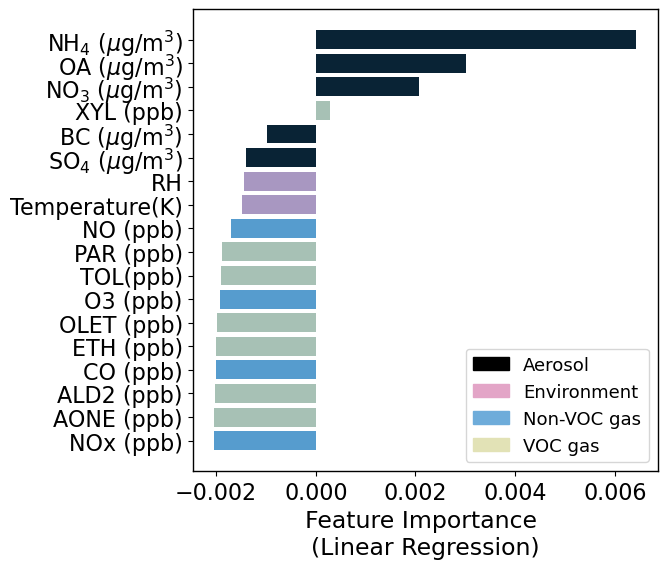

In [9]:
# Define feature categories and colors
feature_categories = {
    'Aerosol': ['BC (ug/m3)', 'OA (ug/m3)', 'NH4 (ug/m3)', 'NO3 (ug/m3)', 'SO4 (ug/m3)'],  
    'VOC gas': ['ETH (ppb)', 'TOL(ppb)', 'XYL (ppb)', 'ALD2 (ppb)', 'AONE (ppb)', 'PAR (ppb)', 'OLET (ppb)',],      
    'Non-VOC gas': ['O3 (ppb)', 'CO (ppb)', 'NO (ppb)', 'NOx (ppb)'],      
    'Environment': ['Temperature(K)', 'RH']  
}

category_colors = {
    'Aerosol': 'black',
    'Environment': '#E3A5C7',
    'Non-VOC gas': '#6EACDA',
    'VOC gas': '#E2E2B6'
}


# Map feature names for display
unit_mapping = {
    'BC (ug/m3)': 'BC ($\mu$g/m$^3$)',
    'OA (ug/m3)': 'OA ($\mu$g/m$^3$)',
    'NH4 (ug/m3)': 'NH$_4$ ($\mu$g/m$^3$)',
    'NO3 (ug/m3)': 'NO$_3$ ($\mu$g/m$^3$)',
    'SO4 (ug/m3)': 'SO$_4$ ($\mu$g/m$^3$)'
}

display_feature_names = [unit_mapping.get(feature, feature) for feature in importance_df['Feature']]

fig, ax = plt.subplots(figsize=(6, 6)) 
plt.barh(range(len(importance_df['Importance'])), importance_df['Importance'], align='center')
plt.yticks(range(len(importance_df['Importance'])), display_feature_names)
plt.xlabel('Importance')
plt.gca().invert_yaxis()

# Assign colors to each feature
colors = []
for feature in importance_df['Feature']:
    for category, features in feature_categories.items():
        if feature in features:
            colors.append(category_colors[category])
            break
    else:
        colors.append('gray')  # Default color if the feature is not in any category

# Plot the bar chart with colors
bars = plt.barh(range(len(importance_df['Importance'])), importance_df['Importance'], align='center', color=colors, alpha=0.7)

plt.tick_params(axis='x', labelsize=16)

ax.set_yticklabels(display_feature_names, fontsize=16)
ax.set_xlabel('Feature Importance \n(Linear Regression)', fontsize=17)

# Add legend
legend_patches = [mpatches.Patch(color=color, label=category) for category, color in category_colors.items()]
ax.legend(handles=legend_patches, loc='best', fontsize=13)

for spine in plt.gca().spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1)
plt.savefig('Permutation_LR.png', dpi=400, bbox_inches='tight')

plt.show()